<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-12-13 06:24:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  31.5MB/s    in 1.1s    

2021-12-13 06:24:36 (31.5 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [ ]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [15]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

SyntaxError: invalid syntax (3948573934.py, line 5)

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


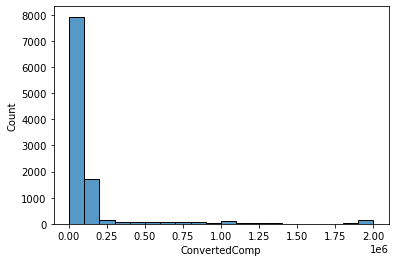

In [25]:
QUERY = """
select * from master"""
df = pd.read_sql_query(QUERY,conn)

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['ConvertedComp'], bins=20)
plt.show()

### Box Plots


Plot a box plot of `Age.`


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

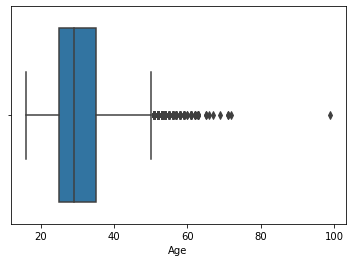

In [27]:
sns.boxplot(df['Age'])

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

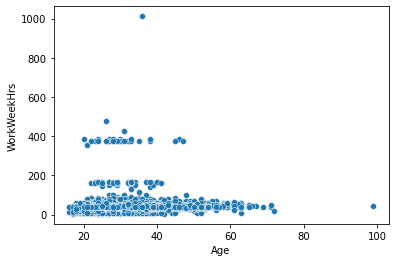

In [28]:
sns.scatterplot(x='Age',y='WorkWeekHrs',data=df)

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [45]:
#sns.scatterplot(y='CodeRevHrs',x='WorkWeekHrs',size='Age',data=df)
#plt.show()
df['Age']

0        22.0
1        23.0
2        28.0
3        26.0
4        29.0
         ... 
11393    36.0
11394    25.0
11395    34.0
11396    25.0
11397    30.0
Name: Age, Length: 11398, dtype: float64

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


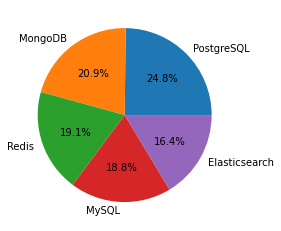

In [100]:
# read table DatabaseDesireNextYear from sql
df_desire = pd.read_sql_query('select * from DatabaseDesireNextYear',conn)
df_desire
# count by language
df_desire = df_desire.groupby(['DatabaseDesireNextYear'], as_index=False).count()
# sort and get top 5
df_desire_top5 = df_desire.sort_values(by='Respondent',ascending=False).head(5)

# plot the pie chart
plt.pie('Respondent', labels='DatabaseDesireNextYear', data=df_desire_top5, autopct='%.1f%%')
plt.show()

In [162]:
# read table DatabaseDesireNextYear from sql
df_lang_desire = pd.read_sql_query('select * from LanguageDesireNextYear',conn)
# count by language
df_lang_desire = df_lang_desire.groupby(['LanguageDesireNextYear'], as_index=False).count()
# sort and get top 5
df_lang_desire_top5 = df_lang_desire.sort_values(by='Respondent',ascending=False).head(5)
df_lang_desire_top5

,LanguageDesireNextYear,Respondent
13,JavaScript,6630
11,HTML/CSS,5328
18,Python,5239
22,SQL,5012
25,TypeScript,4088


In [20]:
df_curr_db = pd.read_sql_query('select * from DatabaseWorkedWith',conn)
df_curr_db_count = df_curr_db.groupby(['Respondent'], as_index=False).count()
one_db = df_curr_db_count[(df_curr_db_count['DatabaseWorkedWith']==1)]['Respondent']
one_db
#df_curr_db[(df_curr_db['DatabaseWorkedWith']=='MySQL')]
df_one_db=df_curr_db[df_curr_db['Respondent'].isin(one_db)]
df_one_db.loc[df_one_db['DatabaseWorkedWith']=='MySQL'].count()

Respondent            474
DatabaseWorkedWith    474
dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


/tmp/wsuser/ipykernel_622/4189767572.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_30to35_median = df_30to35.groupby(['Age'], as_index=False)['WorkWeekHrs','CodeRevHrs'].median()


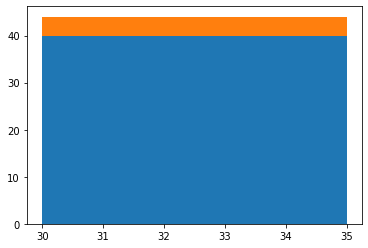

In [140]:
df_30to35 = df[(df['Age']>=30) & (df['Age']<=35)]
df_30to35_median = df_30to35.groupby(['Age'], as_index=False)['WorkWeekHrs','CodeRevHrs'].median()
plt.stackplot(df_30to35_median['Age'],df_30to35_median['WorkWeekHrs'],df_30to35_median['CodeRevHrs'])

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

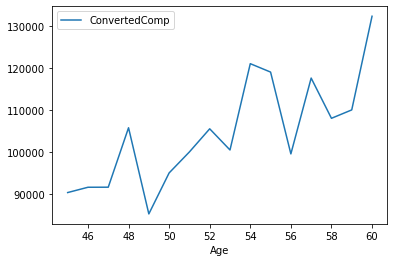

In [144]:
df_45to60 = df[(df['Age']>=45) & (df['Age']<=60)]
df_45to60_median = df_45to60.groupby(['Age'], as_index=False)['ConvertedComp'].median()
df_45to60_median.plot.line('Age','ConvertedComp')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:>

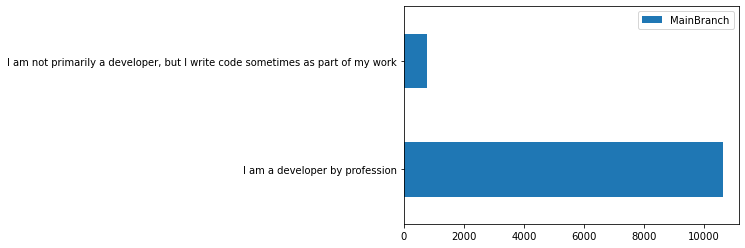

In [158]:
df_MainBranch = pd.DataFrame(df['MainBranch'].value_counts())
df_MainBranch.plot.barh()

In [ ]:
df_DevType = pd.read_sql_query('select * from DevType',conn)
df_DevType.value_counts()

Close the database connection.


In [159]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
